In [2]:
import pandas as pd

train_file_path = "/content/sample_data/twitter_training.csv"
test_file_path = "/content/sample_data/twitter_test.csv"

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

print(df_train.shape)
df_train.head()


(74682, 4)


,ID,name,class,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      74682 non-null  int64 
 1   name    74682 non-null  object
 2   class   74682 non-null  object
 3   text    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
print(df_test.shape)
df_test.head()

(1000, 4)


,ID,name,class,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df_train.drop(columns=['ID','name'],inplace=True)
df_train.head()

,class,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df_test.drop(columns=['ID','name'],inplace=True)
df_test.head()

,class,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [8]:
df_train["class"].value_counts()

,count
class,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [9]:
df_train.duplicated().sum()

np.int64(4911)

In [10]:
df_train.drop_duplicates(inplace=True)

In [11]:
df_train.duplicated().sum()

np.int64(0)

In [12]:
df_train.isnull().sum()

,0
class,0
text,4


In [13]:
df_train.dropna(inplace=True)

<Axes: xlabel='text', ylabel='Count'>

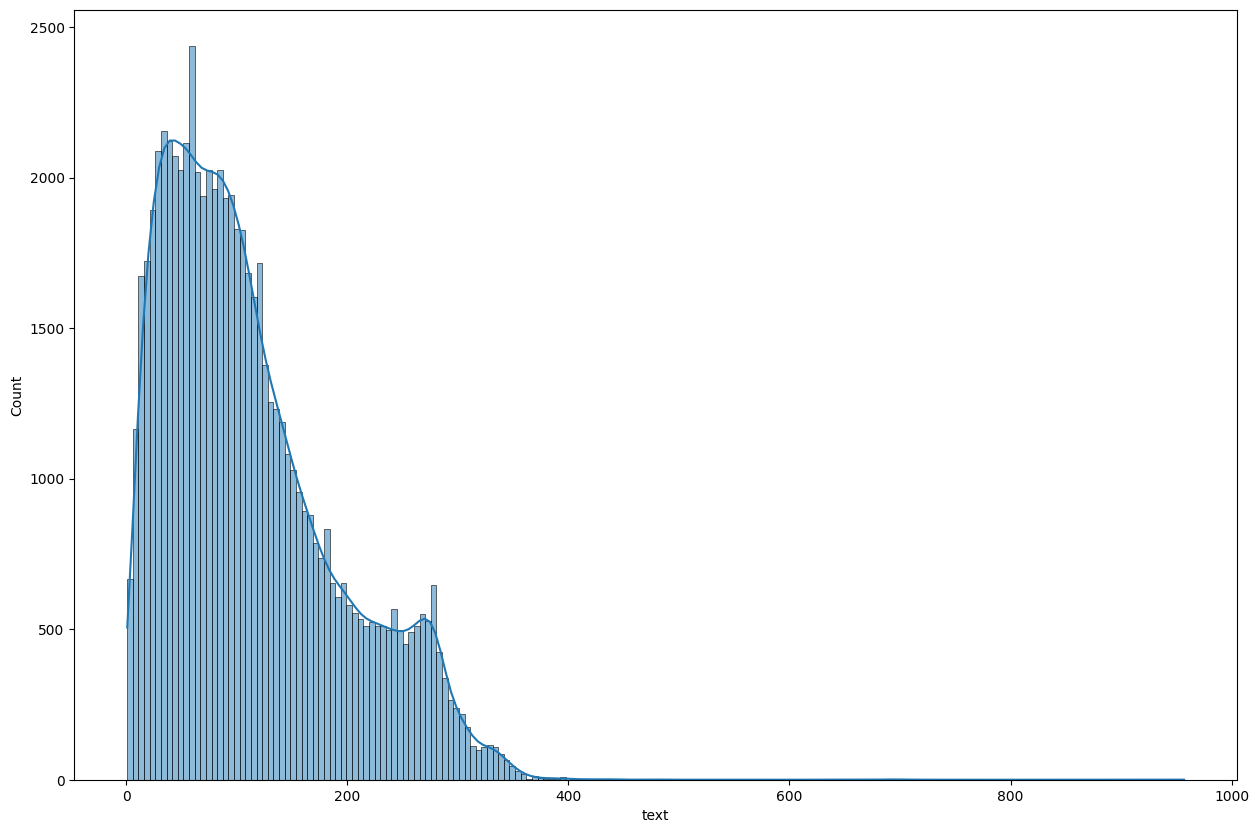

In [14]:
plt.figure(figsize=(15,10))
sns.histplot(x=df_train['text'].apply(len),kde= True)

In [15]:
nltk.download('punkt_tab')
df_train["No_of_Characters"] = df_train["text"].apply(len)
df_train["No_of_Words"]=df_train.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
df_train["No_of_sentence"]=df_train.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<Figure size 1500x1000 with 0 Axes>

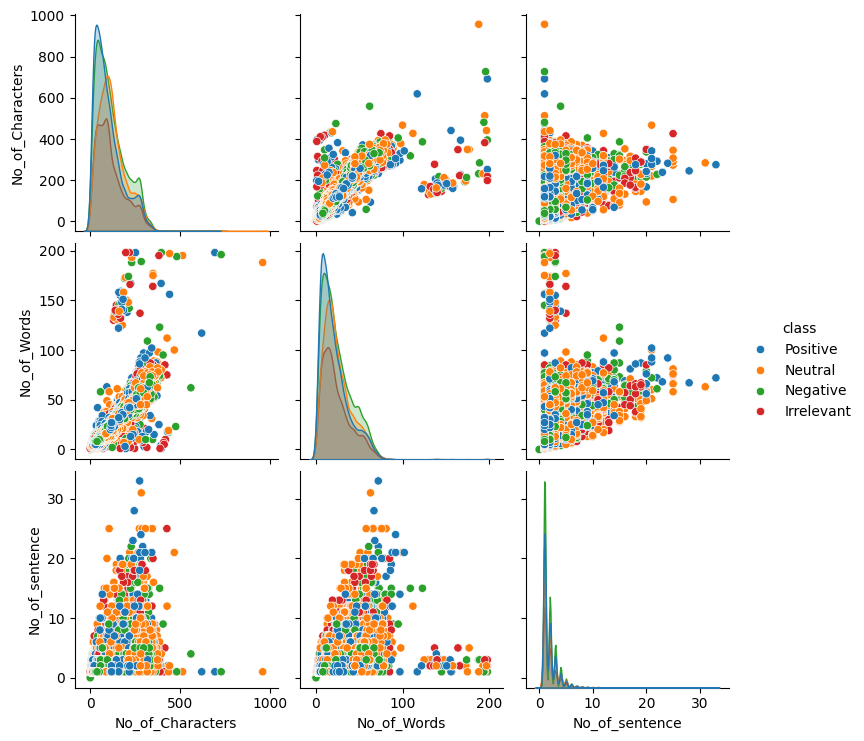

In [16]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df_train, hue="class")

In [17]:
def filter(text):
    clean_text = re.sub('[^A-za-z\s]' , '',text)
    clean_text = clean_text.lower()
    return clean_text

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1427343677.py:2: SyntaxWarning: invalid escape sequence '\s'
  clean_text = re.sub('[^A-za-z\s]' , '',text)


In [18]:
df_train["clean_text"] = df_train["text"].apply(filter)
df_train.head()

,class,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,51,13,1,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,51,11,1,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,im getting on borderlands and i will murder y...


In [19]:
nltk.download('punkt_tab')
df_train["tokenize_text"]=df_train.apply(lambda row: nltk.word_tokenize(row["clean_text"]), axis=1)
df_train.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,class,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,tokenize_text
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,Positive,I am coming to the borders and I will kill you...,51,13,1,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will..."
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k..."
3,Positive,im coming on borderlands and i will murder you...,51,11,1,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m..."


In [20]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])
def lemmatize(tok_text):
        doc= " ".join(tok_text)
        tokens = nlp(doc)
        return [token.lemma_ for token in tokens]

In [21]:
df_train["lemma_text"] = df_train["tokenize_text"].apply(lemmatize)
df_train.head()

,class,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,tokenize_text,lemma_text
0,Positive,im getting on borderlands and i will murder yo...,53,11,1,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m...","[I, m, get, on, borderland, and, I, will, murd..."
1,Positive,I am coming to the borders and I will kill you...,51,13,1,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will...","[I, be, come, to, the, border, and, I, will, k..."
2,Positive,im getting on borderlands and i will kill you ...,50,11,1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k...","[I, m, get, on, borderland, and, I, will, kill..."
3,Positive,im coming on borderlands and i will murder you...,51,11,1,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[I, m, come, on, borderland, and, I, will, mur..."
4,Positive,im getting on borderlands 2 and i will murder ...,57,13,1,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m...","[I, m, get, on, borderland, and, I, will, murd..."


In [22]:
df_train['class'] = df_train['class'].map({"Irrelevant": 3,"Neutral": 2,"Positive": 1, "Negative": 0})

In [23]:
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df_train["no_stopword_text"] = df_train["lemma_text"].apply(remove_stopwords)
df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,tokenize_text,lemma_text,no_stopword_text
0,1,im getting on borderlands and i will murder yo...,53,11,1,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m...","[I, m, get, on, borderland, and, I, will, murd...","[I, get, borderland, I, murder]"
1,1,I am coming to the borders and I will kill you...,51,13,1,i am coming to the borders and i will kill you...,"[i, am, coming, to, the, borders, and, i, will...","[I, be, come, to, the, border, and, I, will, k...","[I, come, border, I, kill]"
2,1,im getting on borderlands and i will kill you ...,50,11,1,im getting on borderlands and i will kill you all,"[im, getting, on, borderlands, and, i, will, k...","[I, m, get, on, borderland, and, I, will, kill...","[I, get, borderland, I, kill]"
3,1,im coming on borderlands and i will murder you...,51,11,1,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[I, m, come, on, borderland, and, I, will, mur...","[I, come, borderland, I, murder]"
4,1,im getting on borderlands 2 and i will murder ...,57,13,1,im getting on borderlands and i will murder y...,"[im, getting, on, borderlands, and, i, will, m...","[I, m, get, on, borderland, and, I, will, murd...","[I, get, borderland, I, murder, I]"


In [24]:
df_train.columns

Index(['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence',
       'clean_text', 'tokenize_text', 'lemma_text', 'no_stopword_text'],
      dtype='object')

In [25]:
df_train["no_stopword_text"] = df_train['no_stopword_text'].apply(lambda x: " ".join(x))
X = df_train[['No_of_Characters','No_of_Words','No_of_sentence','no_stopword_text']]
y = df_train['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0167, stratify=y, random_state=42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1,2))
X_train_tf = vectorizer.fit_transform(X_train['no_stopword_text'])
X_test_tf = vectorizer.transform(X_test['no_stopword_text'])

In [28]:
from scipy.sparse import hstack, csr_matrix
X_train_num = X_train[['No_of_Characters','No_of_Words','No_of_sentence']].values
X_test_num = X_test[['No_of_Characters','No_of_Words','No_of_sentence']].values

X_train_num_sparse = csr_matrix(X_train_num)
X_test_num_sparse = csr_matrix(X_test_num)

X_train_combined = hstack([X_train_tf, X_train_num_sparse])
X_test_combined = hstack([X_test_tf, X_test_num_sparse])

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=2000,random_state=42)
logistic_model.fit(X_train_combined,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, random_state=42)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = logistic_model.predict(X_test_combined)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
train_accuracy = logistic_model.score(X_train_combined,y_train)
test_accuracy = logistic_model.score(X_test_combined,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[265  29  55   6]
 [ 30 233  49   8]
 [ 36  41 195  14]
 [ 34  51  37  83]]
Train accuracy:  0.7056602673430417
Test accuracy:  0.6655231560891939

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       355
           1       0.66      0.73      0.69       320
           2       0.58      0.68      0.63       286
           3       0.75      0.40      0.53       205

    accuracy                           0.67      1166
   macro avg       0.68      0.64      0.64      1166
weighted avg       0.68      0.67      0.66      1166



In [31]:
import re
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# --- Basic setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tokenize text
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    return text.split()

# Build vocab
from collections import Counter
counter = Counter()
for t in df_train["text"]:
    counter.update(tokenize(t))
vocab = {"<pad>": 0, "<unk>": 1}
for word, freq in counter.items():
    if freq >= 2:
        vocab[word] = len(vocab)

def encode(text, max_len=50):
    tokens = tokenize(text)
    ids = [vocab.get(t, 1) for t in tokens[:max_len]]
    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    return ids

# Encode dataset
X = torch.tensor([encode(t) for t in df_train["clean_text"]], dtype=torch.long)


y = torch.tensor(df_train["class"], dtype=torch.long)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.0167, stratify=y, random_state=42)

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# --- Define LSTM model ---
class LSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=128, num_classes=4):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

model = LSTMSentiment(vocab_size=len(vocab), num_classes=4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
class_weights = compute_class_weight("balanced", classes=np.unique(y.numpy()), y=y.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# --- Training loop ---
for epoch in range(1, 11):
    model.train()
    total_loss = 0
    for xb, yb in tqdm(train_loader, desc=f"Epoch {epoch}"):
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch} | Train Loss: {total_loss/len(train_loader):.4f}")

    # Validation
    model.eval()
    preds_all, y_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            preds = model(xb).argmax(1).cpu()
            preds_all.extend(preds.tolist())
            y_true.extend(yb.tolist())
    print("\nValidation Report:")
    label_names = ["Negative", "Positive", "Neutral", "Irrelevant"]
    print(classification_report(y_true, preds_all, target_names=label_names))


print("✅ Training complete!")

# --- Predict on new data ---
def predict(df_test):
    label_map = {"Negative": 0, "Positive": 1, "Neutral": 2, "Irrelevant": 3}
    inv_label_map = {v: k for k, v in label_map.items()}
    X_test = torch.tensor([encode(t) for t in df_test["text"]], dtype=torch.long)
    test_loader = DataLoader(X_test, batch_size=64)
    preds = []
    model.eval()
    with torch.no_grad():
        for xb in test_loader:
            xb = xb.to(device)
            preds.extend(model(xb).argmax(1).cpu().tolist())
    df_test["predicted_class"] = [inv_label_map[i] for i in preds]
    return df_test[["text", "predicted_class"]]


Epoch 1: 100%|██████████| 1072/1072 [02:16<00:00,  7.83it/s]


Epoch 1 | Train Loss: 1.3784

Validation Report:
              precision    recall  f1-score   support

    Negative       0.46      0.41      0.44       355
    Positive       0.32      0.42      0.36       320
     Neutral       0.62      0.02      0.03       286
  Irrelevant       0.17      0.35      0.23       205

    accuracy                           0.31      1166
   macro avg       0.39      0.30      0.26      1166
weighted avg       0.41      0.31      0.28      1166



Epoch 2: 100%|██████████| 1072/1072 [02:13<00:00,  8.01it/s]


Epoch 2 | Train Loss: 1.1862

Validation Report:
              precision    recall  f1-score   support

    Negative       0.77      0.66      0.71       355
    Positive       0.65      0.57      0.61       320
     Neutral       0.54      0.68      0.60       286
  Irrelevant       0.29      0.31      0.30       205

    accuracy                           0.58      1166
   macro avg       0.56      0.55      0.55      1166
weighted avg       0.59      0.58      0.58      1166



Epoch 3: 100%|██████████| 1072/1072 [02:16<00:00,  7.84it/s]


Epoch 3 | Train Loss: 0.8587

Validation Report:
              precision    recall  f1-score   support

    Negative       0.80      0.75      0.78       355
    Positive       0.80      0.68      0.73       320
     Neutral       0.81      0.65      0.72       286
  Irrelevant       0.44      0.71      0.54       205

    accuracy                           0.70      1166
   macro avg       0.71      0.70      0.69      1166
weighted avg       0.74      0.70      0.71      1166



Epoch 4: 100%|██████████| 1072/1072 [02:17<00:00,  7.79it/s]


Epoch 4 | Train Loss: 0.5635

Validation Report:
              precision    recall  f1-score   support

    Negative       0.82      0.83      0.83       355
    Positive       0.89      0.70      0.79       320
     Neutral       0.76      0.85      0.80       286
  Irrelevant       0.65      0.76      0.70       205

    accuracy                           0.79      1166
   macro avg       0.78      0.78      0.78      1166
weighted avg       0.80      0.79      0.79      1166



Epoch 5: 100%|██████████| 1072/1072 [02:16<00:00,  7.85it/s]


Epoch 5 | Train Loss: 0.3567

Validation Report:
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.84       355
    Positive       0.86      0.80      0.83       320
     Neutral       0.86      0.78      0.82       286
  Irrelevant       0.72      0.84      0.78       205

    accuracy                           0.82      1166
   macro avg       0.82      0.82      0.82      1166
weighted avg       0.83      0.82      0.82      1166



Epoch 6: 100%|██████████| 1072/1072 [02:15<00:00,  7.88it/s]


Epoch 6 | Train Loss: 0.2409

Validation Report:
              precision    recall  f1-score   support

    Negative       0.88      0.85      0.86       355
    Positive       0.83      0.82      0.83       320
     Neutral       0.87      0.80      0.83       286
  Irrelevant       0.73      0.86      0.79       205

    accuracy                           0.83      1166
   macro avg       0.83      0.83      0.83      1166
weighted avg       0.84      0.83      0.83      1166



Epoch 7: 100%|██████████| 1072/1072 [02:20<00:00,  7.61it/s]


Epoch 7 | Train Loss: 0.1734

Validation Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87       355
    Positive       0.82      0.83      0.83       320
     Neutral       0.86      0.81      0.83       286
  Irrelevant       0.76      0.81      0.78       205

    accuracy                           0.83      1166
   macro avg       0.83      0.83      0.83      1166
weighted avg       0.84      0.83      0.83      1166



Epoch 8: 100%|██████████| 1072/1072 [02:26<00:00,  7.34it/s]


Epoch 8 | Train Loss: 0.1331

Validation Report:
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86       355
    Positive       0.88      0.83      0.85       320
     Neutral       0.84      0.84      0.84       286
  Irrelevant       0.77      0.85      0.81       205

    accuracy                           0.84      1166
   macro avg       0.84      0.84      0.84      1166
weighted avg       0.85      0.84      0.85      1166



Epoch 9: 100%|██████████| 1072/1072 [02:24<00:00,  7.44it/s]


Epoch 9 | Train Loss: 0.1113

Validation Report:
              precision    recall  f1-score   support

    Negative       0.85      0.88      0.87       355
    Positive       0.90      0.83      0.86       320
     Neutral       0.86      0.79      0.83       286
  Irrelevant       0.74      0.86      0.80       205

    accuracy                           0.84      1166
   macro avg       0.84      0.84      0.84      1166
weighted avg       0.85      0.84      0.84      1166



Epoch 10: 100%|██████████| 1072/1072 [02:20<00:00,  7.65it/s]


Epoch 10 | Train Loss: 0.0947

Validation Report:
              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87       355
    Positive       0.85      0.88      0.86       320
     Neutral       0.87      0.80      0.83       286
  Irrelevant       0.84      0.82      0.83       205

    accuracy                           0.85      1166
   macro avg       0.85      0.85      0.85      1166
weighted avg       0.85      0.85      0.85      1166

✅ Training complete!


In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Get predictions
df_pred = predict(df_test)

# Merge with actual labels
df_pred["true_class"] = df_test["class"]

# Compute metrics
acc = accuracy_score(df_pred["true_class"], df_pred["predicted_class"])
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(
    df_pred["true_class"],
    df_pred["predicted_class"],
    target_names=["Negative", "Positive", "Neutral", "Irrelevant"]
))


Accuracy: 0.9250

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.95      0.91       172
    Positive       0.94      0.94      0.94       266
     Neutral       0.91      0.92      0.91       285
  Irrelevant       0.96      0.90      0.93       277

    accuracy                           0.93      1000
   macro avg       0.92      0.93      0.92      1000
weighted avg       0.93      0.93      0.93      1000

